In [1]:
import networkx as nx
import matplotlib.pyplot as plt
G1 =nx.read_edgelist('facebook_combined.txt', create_using = nx.Graph(), nodetype=int)

In [61]:
betCent = nx.betweenness_centrality(G1, normalized=True, endpoints=True)

In [3]:
degreeCent = nx.degree_centrality(G1)

In [4]:
closenessCent = nx.closeness_centrality(G1, u=None, distance=None, wf_improved=True)

In [9]:
from networkx import eigenvector_centrality
from networkx import load_centrality

In [7]:
EigCent= eigenvector_centrality(G1, max_iter=100, tol=1e-06, nstart=None, weight=None)

In [10]:
LoadCentr=load_centrality(G1, v=None, cutoff=None, normalized=True, weight=None)

In [62]:
#dictionary with all the results for each node of all the centrality measures applied 
final_dict= dict()
for x in betCent.keys():
    new_dic=dict()
    new_dic['betCent']= betCent[x]
    new_dic['degreeCent']=degreeCent[x]
    new_dic['closenessCent']=closenessCent[x]
    new_dic['eigCent']=EigCent[x]
    new_dic['loadCent']= LoadCentr[x]
    final_dict[x]=new_dic

In [63]:
import pandas as pd
df = pd.DataFrame(final_dict)
df = df.transpose()

In [64]:
df

,betCent,degreeCent,closenessCent,eigCent,loadCent
0,0.146729,0.085934,0.353343,3.391796e-05,1.458927e-01
1,0.000498,0.004210,0.261376,6.045346e-07,2.783274e-06
2,0.000495,0.002476,0.261258,2.233461e-07,7.595021e-08
3,0.000497,0.004210,0.261376,6.635648e-07,1.685066e-06
4,0.000495,0.002476,0.261258,2.236416e-07,1.840332e-07
...,...,...,...,...,...
4034,0.000495,0.000495,0.183989,2.951270e-10,0.000000e+00
4035,0.000495,0.000248,0.183980,2.912901e-10,0.000000e+00
4036,0.000495,0.000495,0.183989,2.931223e-10,0.000000e+00
4037,0.000495,0.000991,0.184005,2.989233e-10,7.156847e-08


In [65]:
import matplotlib.ticker

C:\Users\marta\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


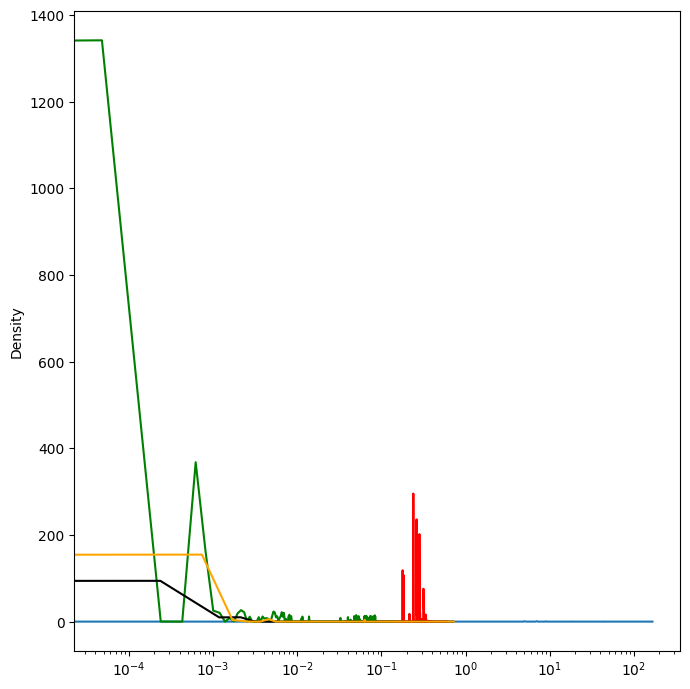

In [107]:
plt.rcParams["figure.figsize"] = [7, 7]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
df['degreeCent'].value_counts().plot( kind='kde', ax=ax, logx=True, bw_method=0.0005)
df['closenessCent'].plot( kind='kde', ax=ax, logx=True, bw_method=0.0005, color='red')
df['eigCent'].plot(kind='kde', ax=ax, logx=True, bw_method=0.0005, color='green')
df['loadCent'].plot(kind='kde', ax=ax, logx=True, bw_method=0.0005, color='black')
df['betCent'].plot(kind='kde', ax=ax, logx= True, bw_method=0.0005, color = 'orange')
plt.show()

This graph shows the probability density functions obtained through the Pandas method <b>'kde'</b>, passing as input all the results obtained for each of the five centrality measures applied in our investigation. In particular, <b>pandas.DataFrame.plot.kde</b> generate a Kernel Density Estimate plot using Gaussian kernels. In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function (PDF) of a random variable (as we can consider each of the executed centrality measures). This function uses Gaussian kernels and includes automatic bandwidth determination, even if in this case we decided to set the scalar bandwidth equal to 0.0005, which could be considered a very small value but we found it suitable for the very small values we deal with: in this case a larger bandwidth value results in under-fitting.

In particular:
<ul>
    <li>the blue plot represents the PDF of the degree centrality,</li>
    <li>the red plot represents the PDF of the closeness centrality,</li>
    <li>the green plot represents the PDF of the eigenvector centrality,</li>
    <li>the orange plot represents the PDF of the betweenness centrality,</li>
    <li>the black plot represents the PDF of the load centrality</li>
</ul>
    

Analysing the graph obtained from the centrality measures applied to the Facebook Ego Network dataset, we can infer some information:
<ul>
    <li>the degree centrality nodes' values seem to be very different one from the other, the plot is very close to be a line, there isn't a peak in density and the distribution of the values is really spread;</li>
    <li>the red plot, that represents the closeness centrality values' distribution, seems to show the highest concentration of values in the same density area; there are some peaks but we can say that the closeness centrality nodes' values do not vary a lot one from another (differently from the degree centrality distribution);</li>
    <li>the load centrality and the betweenness centrality density functions have a very similar shape, even if the orange plot decreases more rapidly: this prove that the load centrality measure is just slightly different from the betweenness;</li>
    <li>the green plot has the most uncommon trend: starting from very low eigenvector centrality values, the curve decreases rapidly till 0, then there is a quite high and defined peak, after which the curve tends to go to 0 for higher eigenvector centrality values.</li>
</ul>

<p>So we can say that for this network while there is a strong similarity betweeen the betweenness and the load centrality, there is a difference between the closeness centrality and degree centrality values. It means that while there are few nodes with an high number of connections to other nodes, the Facebook Ego Network's nodes have very similar values of closeness centrality, so there are few marginal nodes in the network and it is highly interconnected. <p>